In [1]:
import matplotlib.pyplot as plt
import pandas as pd

db = 'adult.data'
meta = 'adult.names'
cnames = []
with open(meta) as file:
    for line in (file.readlines()[-14:]):
        cnames.append(line.split(':')[0])
cnames.append("salary")
df = pd.read_csv(db, index_col = False, names = cnames, sep = ', ', engine = 'python')
print(df)
print(df[['education-num', 'education']].drop_duplicates().sort_values(by = 'education-num'))

       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

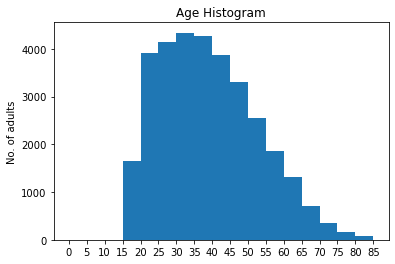

In [2]:
plt.hist(df['age'], bins = range(0,max(df.age),5))
plt.title("Age Histogram")
plt.ylabel("No. of adults")
plt.xticks(range(0, max(df.age), 5))
plt.show()

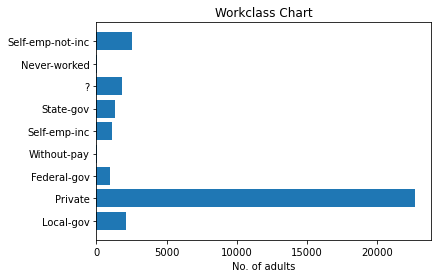

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [3]:
#Workclass
wc_df = pd.DataFrame(df['workclass'].value_counts(sort = False))
wc_df.reset_index(inplace=True)
wc_df.columns = ["wc", "count"]
plt.barh(wc_df.wc, wc_df['count'])
plt.xlabel("No. of adults")
plt.title("Workclass Chart")
plt.show()

#Education
edu_df = pd.DataFrame(df[['education-num', 'education']].value_counts(sort = False))
edu_df.reset_index(inplace=True)
edu_df.columns = ["education-num", "education", "count"]
plt.barh(edu_df.education, edu_df['count'])
plt.xlabel("No. of adults")
plt.title("Education Chart")
plt.show()
#df['education'].value_counts().plot(kind='barh')

#Relationship
rship_df = pd.DataFrame(df['relationship'].value_counts(sort = False))
rship_df.reset_index(inplace=True)
rship_df.columns = ["relationship", "count"]

plt.pie(rship_df['count'], labels = rship_df.relationship, autopct = '%.2f%%')
plt.title("Pie Chart")

plt.axes([1.25,0.25,0.75,0.5])
plt.barh(rship_df.relationship, rship_df['count'])
plt.xlabel("No. of adults")
plt.title("Bar Chart")

plt.suptitle("Relationship", x = 1)
plt.show()

#Race
race_df = pd.DataFrame(df['race'].value_counts(sort = False))
race_df.reset_index(inplace=True)
race_df.columns = ["race", "count"]

plt.pie(race_df['count'], labels = race_df.race, autopct = '%.2f%%')
plt.title("Pie Chart")

plt.axes([1.25,0.25,0.75,0.5])
plt.barh(race_df.race, race_df['count'])
plt.title("Bar Chart")
plt.xlabel("No. of adults")

plt.suptitle("Race", x = 1)
plt.show()

#Native-Country
country_df = pd.DataFrame(df['native-country'].value_counts(sort = False))
country_df.reset_index(inplace=True)
country_df.columns = ["country", "count"]
plt.pie(country_df['count'], labels = country_df.country, autopct='%.2f%%')
#plt.barh(country_df.country, country_df['count'])
plt.title("Native Country Chart")
plt.show()

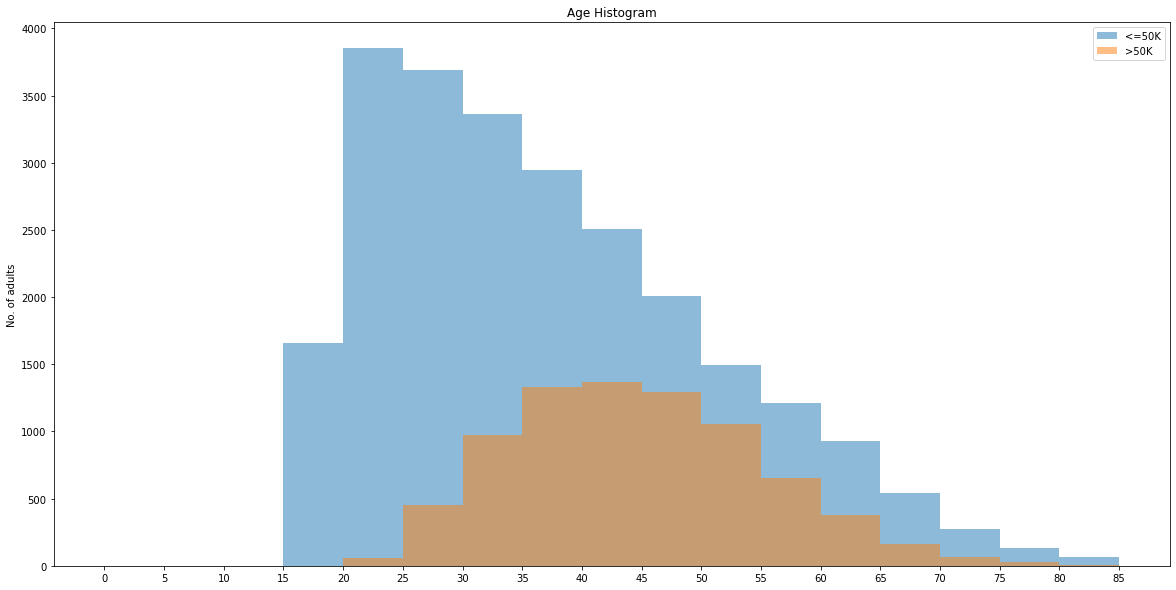

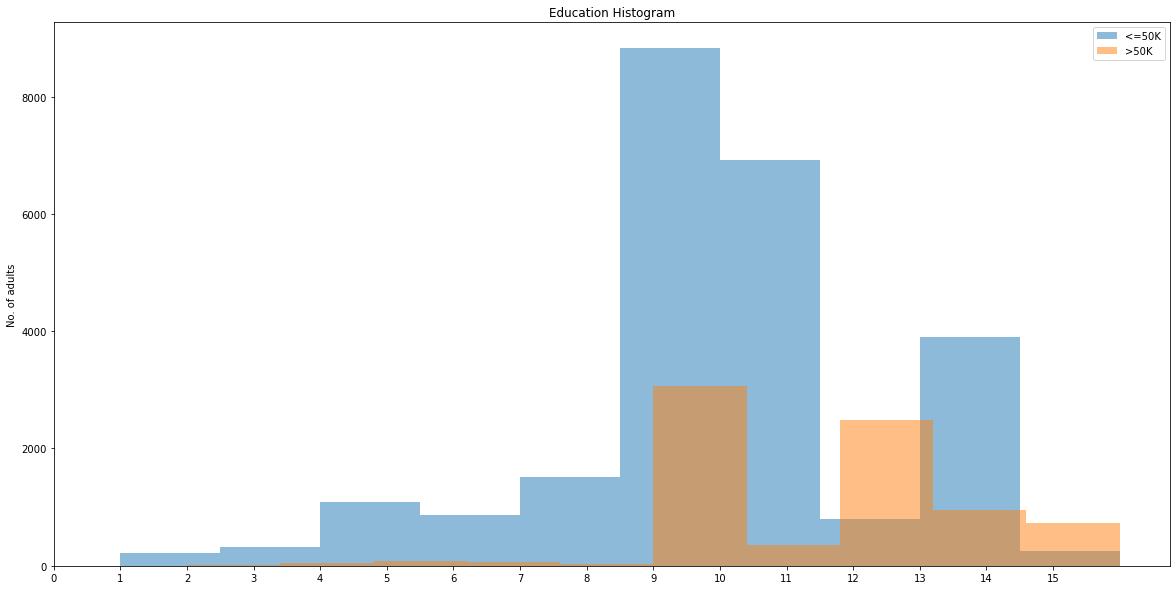

       education-num     education
0                 13     Bachelors
1                 13     Bachelors
2                  9       HS-grad
3                  7          11th
4                 13     Bachelors
...              ...           ...
32553             14       Masters
32555             10  Some-college
32556             12    Assoc-acdm
32558              9       HS-grad
32559              9       HS-grad

[24720 rows x 2 columns]


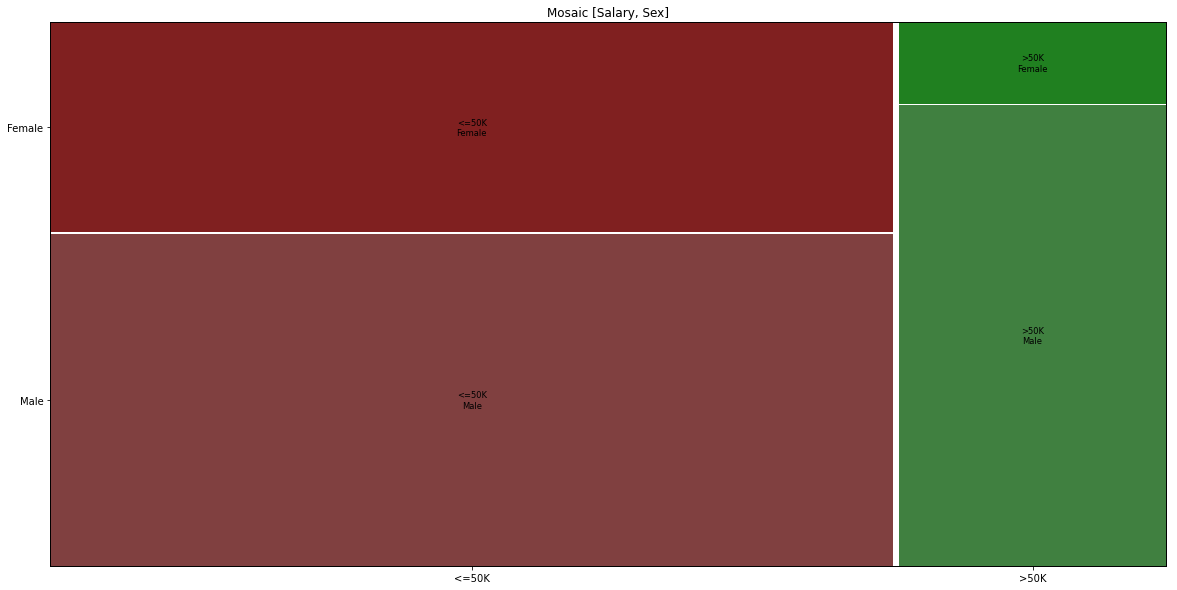

In [8]:
from statsmodels.graphics.mosaicplot import mosaic

plt.hist(df[df['salary'] == '<=50K']['age'], bins = range(0,max(df.age),5), alpha = 0.5, label = '<=50K')
#plt.hist(df[df['age'], bins = range(0,max(df.age),5), alpha = 0.5, label = '<=50K')
plt.hist(df[df['salary'] == '>50K']['age'], bins = range(0,max(df.age),5), alpha = 0.5, label = '>50K')
plt.title("Age Histogram")
plt.ylabel("No. of adults")
plt.legend()
plt.xticks(range(0, max(df.age), 5))
plt.show()

plt.hist(df[df['salary'] == '<=50K']['education-num'], alpha = 0.5, label = '<=50K')
#plt.hist(df[df['age'], bins = range(0,max(df.age),5), alpha = 0.5, label = '<=50K')
plt.hist(df[df['salary'] == '>50K']['education-num'], alpha = 0.5, label = '>50K')
plt.title("Education Histogram")
plt.ylabel("No. of adults")
plt.legend()
plt.xticks(range(0, max(df['education-num']), 1))
plt.show()

print(df[df['salary'] == '<=50K'][['education-num', 'education']])
mosaic(df, ['salary', 'sex'])
plt.title("Mosaic [Salary, Sex]")
plt.show()